<a href="https://colab.research.google.com/github/Darkunquie/FMML_PROJECT_2024/blob/main/Module_6_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Building a Nueral Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import random

In [2]:

iris = load_iris()
data, labels = iris.data[:,0:2], iris.data[:,2]

num_samples = len(labels)
shuffle_order = np.random.permutation(num_samples)
data = data[shuffle_order, :]
labels = labels[shuffle_order]

In [3]:
def weighted_sum(x, w, b):
    return b + np.dot(w, x)

# set our paramters - weights and bias
w = [0.2, 0.6]
b = -0.3

# for example, let's use the first data point
X, y = data, labels

pred_y = [weighted_sum(x, w, b) for x in X]

# let's print out the first prediction
print("for x=[%0.2f, %0.2f], predicted = %0.2f, actual = %0.2f" % (X[0][0], X[0][1], pred_y[0], y[0]))

for x=[6.70, 2.50], predicted = 2.54, actual = 5.80


In [4]:
def cost_function(y_pred, y_actual):
    return 0.5 * np.sum((y_actual-y_pred)**2)

error = cost_function(pred_y, y)
print(error)

313.50559999999996


In [9]:
X = X / np.amax(X, axis=0)
y = y / np.amax(y, axis=0)

w, b = [random.random(), random.random()], random.random()

def F(X, w, b):
    return np.sum(w*X, axis=1) + b

y_pred = F(X, w, b)
init_cost = cost_function(y_pred, y)

print("initial parameters: w1=%0.3f, w2=%0.3f, b=%0.3f"%(w[0], w[1], b))
print("initial cost = %0.3f" % init_cost)

initial parameters: w1=0.681, w2=0.554, b=0.446
initial cost = 50.695


In [6]:

def dJdw1(X, y, w, b):
    return -np.dot(X[:,0], y - F(X, w, b))

def dJdw2(X, y, w, b):
    return -np.dot(X[:,1], y - F(X, w, b))

def dJdb(X, y, w, b):
    return -np.sum(y - F(X, w, b))

In [10]:
lr = 0.001
n_iters = 2000
errors = []
for i in range(n_iters):
    w[0] = w[0] - lr * dJdw1(X, y, w, b)
    w[1] = w[1] - lr * dJdw2(X, y, w, b)
    b = b - lr * dJdb(X, y, w, b)
    y_pred = F(X, w, b)
    j = cost_function(y_pred, y)
    errors.append(j)

Text(0.5, 0, 'iterations')

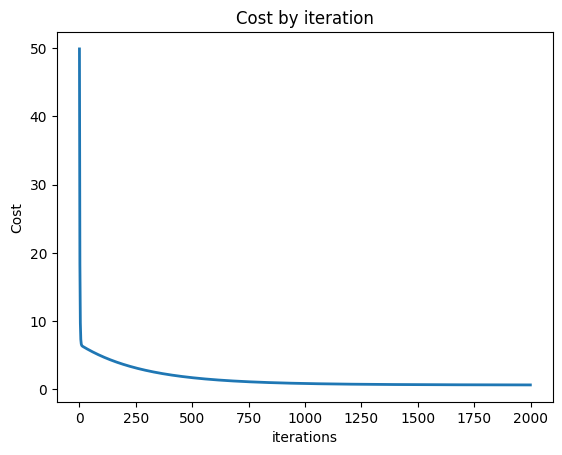

In [8]:
plt.plot(range(n_iters), errors, linewidth=2)
plt.title("Cost by iteration")
plt.ylabel("Cost")
plt.xlabel("iterations")

## sigmoid function.

In [11]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [12]:
def weighted_sum(x, w, b):
    return b + np.dot(w, x)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

w = [0.2, 0.6]
b = -0.3

X, y = data, labels
Z = [weighted_sum(x, w, b) for x in X]

y_pred = [sigmoid(z) for z in Z]

error = cost_function(y_pred, y)
print(error)

829.3581552057614


In [13]:
W1 = np.random.randn(2, 3)
W2 = np.random.randn(3, 1)

print("W1=", W1)
print("W2=", W2)

W1= [[ 2.09528413 -1.05843496 -1.95337396]
 [-0.19941796  0.40181423 -0.23998015]]
W2= [[ 0.03377482]
 [ 0.6324263 ]
 [-0.7042187 ]]


##forward pass

In [14]:
X, y = data, labels

z = np.dot(X, W1)
z = sigmoid(z)

y_pred = np.dot(z, W2)

error = cost_function(y_pred, y)

print('predicted %0.2f for example 0, actual %0.2f, total cost %0.2f'%(pred_y[0], y[0], error))

predicted 2.54 for example 0, actual 5.80, total cost 190329.21


In [15]:
class Neural_Network(object):
    def __init__(self, n0, n1, n2):
        self.n0 = n0
        self.n1 = n1
        self.n2 = n2

        # initialize weights
        self.W1 = np.random.randn(self.n0, self.n1)
        self.W2 = np.random.randn(self.n1 ,self.n2)

    def predict(self, x):
        z = np.dot(x, self.W1)
        z = sigmoid(z)
        y = np.dot(z, self.W2)
        return y


In [16]:
net = Neural_Network(2, 3, 1)

In [17]:
X, y = data, labels
y_pred = net.predict(X)
error = cost_function(y_pred, y)

print('predicted %0.2f for example 0, actual %0.2f, total cost %0.2f'%(pred_y[0], y[0], error))

predicted 2.54 for example 0, actual 5.80, total cost 293511.01


In [18]:
def get_gradient(net, X, y):
    w_delta = 1e-8

    y_pred_current = net.predict(X)
    error_current = cost_function(y_pred_current, y)

    dw1, dw2 = np.zeros((net.n0, net.n1)), np.zeros((net.n1, net.n2))
    W1, W2 = np.copy(net.W1), np.copy(net.W2)
    for i in range(net.n0):
        for j in range(net.n1):
            net.W1 = np.copy(W1)
            net.W1[i][j] += w_delta
            y_pred = net.predict(X)
            error = cost_function(y_pred, y)
            dw1[i][j] = (error - error_current) / w_delta

    for i in range(net.n1):
        for j in range(net.n2):
            net.W2 = np.copy(W2)
            net.W2[i][j] += w_delta
            y_pred = net.predict(X)
            error = cost_function(y_pred, y)
            dw2[i][j] = (error - error_current) / w_delta

    net.W1, net.W2 = np.copy(W1), np.copy(W2)

    return dw1, dw2

In [19]:
X, y = data, labels.reshape((len(labels),1))

X = X/np.amax(X, axis=0)
y = y/np.amax(y, axis=0)

net = Neural_Network(2, 3, 1)
y_orig = net.predict(X)
init_cost = cost_function(y_orig, y)
print("initial cost = %0.3f" % init_cost)
n_epochs = 2000
learning_rate = 0.01
errors = []
for i in range(n_epochs):
    dw1, dw2 = get_gradient(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)
    error = cost_function(y_pred, y)
    errors.append(error)

initial cost = 120.308


Text(0, 0.5, 'Error')

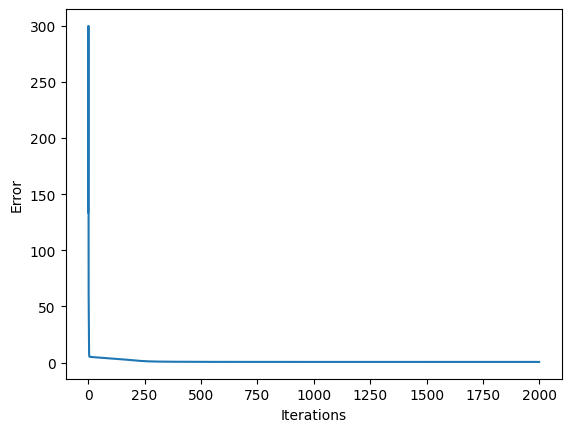

In [20]:
plt.plot(range(0, len(errors)), errors)
plt.xlabel('Iterations')
plt.ylabel('Error')